# Part I - Prosper Loan Data Exploration
#### by Yen Hoang

## Introduction
> This document explores a dataset containing loans and attributes for approximately 100,000 loans made on Prosper.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
print(loans.shape)
loans.head(10)

(94847, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,26:37.1,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,52:56.1,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,49:27.5,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


# Data Cleaning

> - As I want to do analysis on the loan status, any loans that have status as 'Current' will be dropped because their final status are not decided yet.
> - I also map the listing category by its numeric format by creating a new column ListingCategory.

In [4]:
#Drop loans with status 'Current'
loans = loans[loans['LoanStatus'] != 'Current']

In [5]:
#Map the listing category by its numeric format
Listing_category = {0:'Not Available', 
                   1:'Debt Consolidation',
                   2:'Home Improvement',
                   3:'Business',
                   4:'Personal Loan',
                   5:'Student Use',
                   6:'Auto',
                   7:'Other', 
                   8:'Baby&Adoption', 
                   9:'Boat', 
                   10:'Cosmetic Procedure', 
                   11:'Engagement Ring', 
                   12:'Green Loans', 
                   13:'Household Expenses', 
                   14:'Large Purchases', 
                   15:'Medical/Dental',
                   16:'Motorcycle', 
                   17:'RV', 
                   18:'Taxes',
                   19:'Vacation', 
                   20:'Wedding Loans'}

In [6]:
loans['ListingCategory'] = loans['ListingCategory (numeric)'].map(Listing_category)

In [7]:
loans.ListingCategory.value_counts()

Debt Consolidation    15965
Not Available         14148
Other                  5194
Business               3709
Home Improvement       2860
Personal Loan          2002
Auto                   1318
Student Use             631
Household Expenses      556
Medical/Dental          375
Taxes                   199
Large Purchases         183
Vacation                182
Wedding Loans           171
Motorcycle               94
Engagement Ring          61
Baby&Adoption            41
Cosmetic Procedure       39
Boat                     24
Green Loans              22
RV                       15
Name: ListingCategory, dtype: int64

In [8]:
loans.shape

(47789, 82)

>Because the dataset has so many variables, overall checking for whole dataset is not neccessary. Instead, I only check the varibles that I will use for my analysis

In [9]:
loans.LoanStatus.value_counts()

Completed                 31727
Chargedoff                 9971
Defaulted                  4171
Past Due (1-15 days)        680
Past Due (31-60 days)       302
Past Due (61-90 days)       271
Past Due (91-120 days)      251
Past Due (16-30 days)       229
FinalPaymentInProgress      168
Past Due (>120 days)         15
Cancelled                     4
Name: LoanStatus, dtype: int64

In [10]:
#Order Loan status from best to worst
ordinal_status_dict = ['Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
                       'Past Due (31-60 days)','Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled' ]
ordered_status = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_status_dict)
loans['LoanStatus'] = loans['LoanStatus'].astype(ordered_status)

In [11]:
loans.LoanOriginalAmount.value_counts()

4000     4728
5000     3905
3000     3333
2000     3260
1000     2612
         ... 
9920        1
4488        1
11379       1
16646       1
6283        1
Name: LoanOriginalAmount, Length: 1457, dtype: int64

In [12]:
loans.StatedMonthlyIncome.describe()

count     47789.000000
mean       5068.943331
std        5107.966248
min           0.000000
25%        2833.333333
50%        4166.666667
75%        6250.000000
max      618547.833300
Name: StatedMonthlyIncome, dtype: float64

### What is the structure of your dataset?

There are 94847 loans in the original dataset with 81 attributes, which can be devided into 2 groups in general: Borrower features and Loan features. 

Borrowers features include information of the borrower such as BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months... 

Loans features includes information of the loan such as ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, LoanOriginalAmount...

After cleaning, the dataset is cut down to nearly 50000 loans.

### What is/are the main feature(s) of interest in your dataset?

My main interest in the dataset is What factors affecting loan outcome status?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the following attributes should be taken into consideration: LoanStatus, ListingCategory, LoanOriginalAmount, Term, ProsperScore, StatedMonthlyIncome, BankcardUtilization, DebtToIncomeRatio,CurrentCreditLines, OpenRevolvingAccounts.

## Univariate Exploration


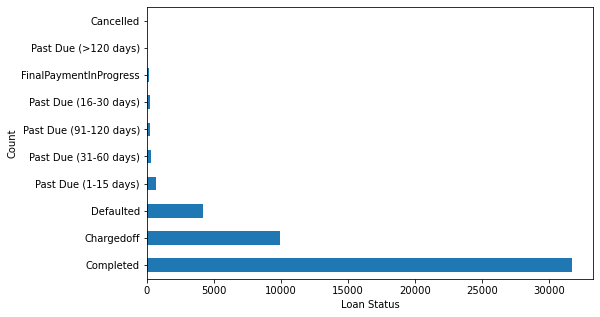

In [13]:
#Distribution of loans status
plt.figure(figsize=[8, 5])
loans.LoanStatus.value_counts().plot(kind = 'barh')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Among different loan statuses, the completed one is the most popular with over 30000 loans. Howerver, bad loans such as Chargedoff loan and Defaulted one account for a considerable amount, which is over 10000 and nearly 5000 respectively. Different Past due ones and Cancelled one take a very small amount. The same happens for Final payment in progess loans.

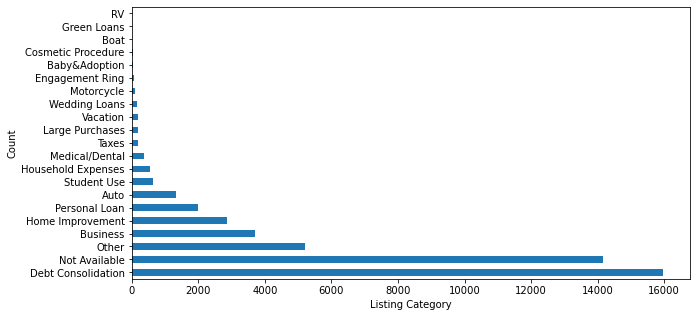

In [14]:
#Distribution of Listing Category
plt.figure(figsize=[10, 5])
loans['ListingCategory'].value_counts().plot(kind = 'barh')
plt.xlabel('Listing Category')
plt.xticks()
plt.ylabel('Count')
plt.show()

Among listing categories, debt consolidation is the most common reason for a loan. Other reasons have much less frequency. There is also a large amount of loans with no specific reason.

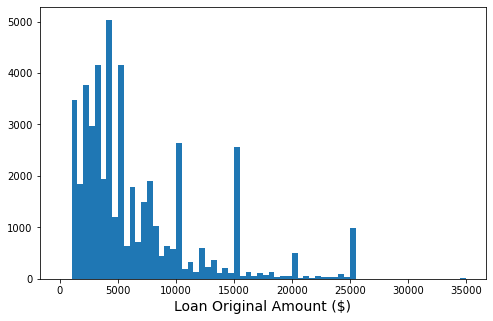

In [15]:
#Distribution of Loan original amount
binsize = 500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)', size = 14)
plt.show()

The distribution of Loan original amount is right skewed with the peak at 4000. However, there are high amount of 10000$, 20000$ and 25000$ loans. After each of those spike, the frequency quickly trails off. These probably represents the standard amount of loans.

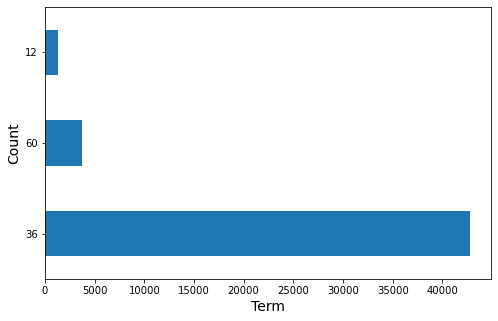

In [16]:
#Distribution of Term
plt.figure(figsize=[8, 5])
loans.Term.value_counts().plot(kind = 'barh')
plt.xlabel('Term', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

Among 3 kinds of terms, 36-month term makes up the most loans, with approximately 45000 loans having this term. The next popular one is 60 month with nearly 5000 loans. And the least common term is 12 months with around 1500 loans.

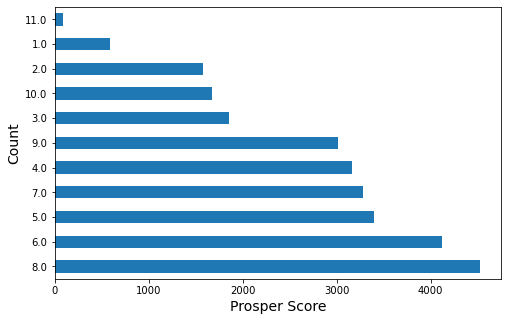

In [17]:
#Distribution of Prosper score
plt.figure(figsize=[8, 5])
loans.ProsperScore.value_counts().plot(kind = 'barh')
plt.xlabel('Prosper Score', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

The most common Prosper score given is 8.0, which is relatively high for a 11 scale rating. The next common one is 6.0 rating. There are not much difference in the distribution of 5.0, 7.0, 4.0 and 9.0 ratings. The more extreme ratings such as 1.0, 2.0, 3.0 and 11.0 are much more uncommon. 

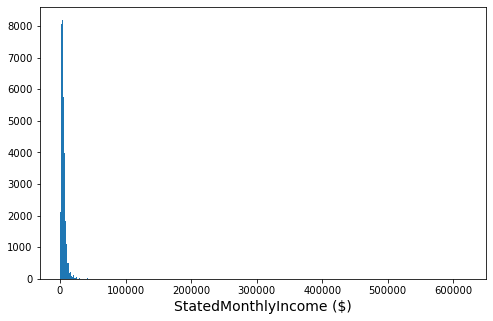

In [18]:
#Distribution of Stated monthly income
binsize = 1000
bins = np.arange(0, loans['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome ($)', size = 14)
plt.show()

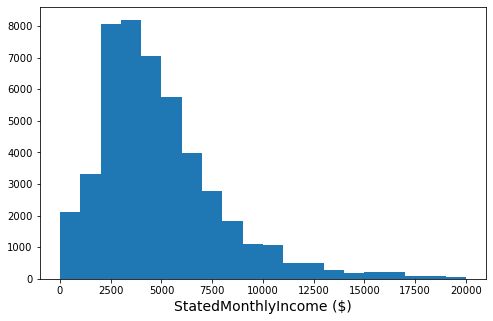

In [19]:
# There appears to be huge outliers, so I remove the top 1% and replot
# Second attempt of Distribution of Stated monthly income
binsize = 1000
bins = np.arange(0, loans['StatedMonthlyIncome'].quantile(0.99)+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome ($)', size =14)
plt.show()

The distribution of Stated monthly income in the first diagram looks distorted. After checking the data, there appears be a huge outlier that make the chart skewed far to the right. The second chart looks much more clearer after removing the outliers - top 1%. We can see that the Stated monthly income jumps high from 1200 dollars to 2500 dollars and peaks at 3750 dollars. Then it decreases gradually as the amount of monthly income increases. 

In [20]:
loans['BankcardUtilization'] = loans.BankcardUtilization.map(lambda x: x*100)

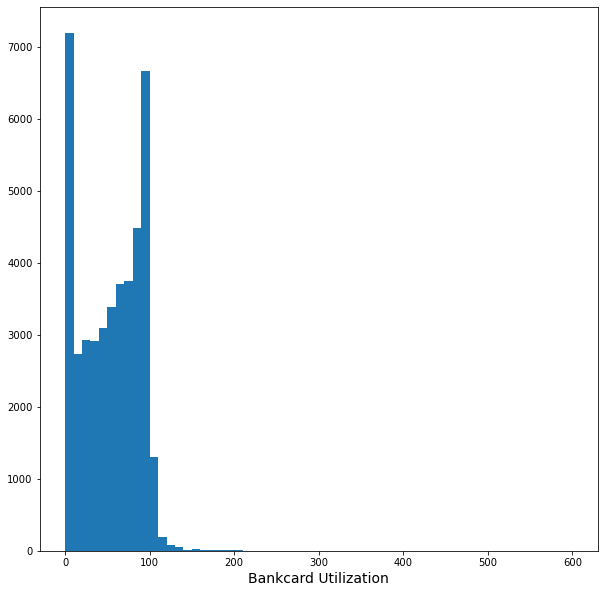

In [21]:
binsize = 10
bins = np.arange(0, loans['BankcardUtilization'].max()+binsize, binsize)
plt.figure(figsize=[10, 10])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlabel('Bankcard Utilization', size =14)
plt.show()

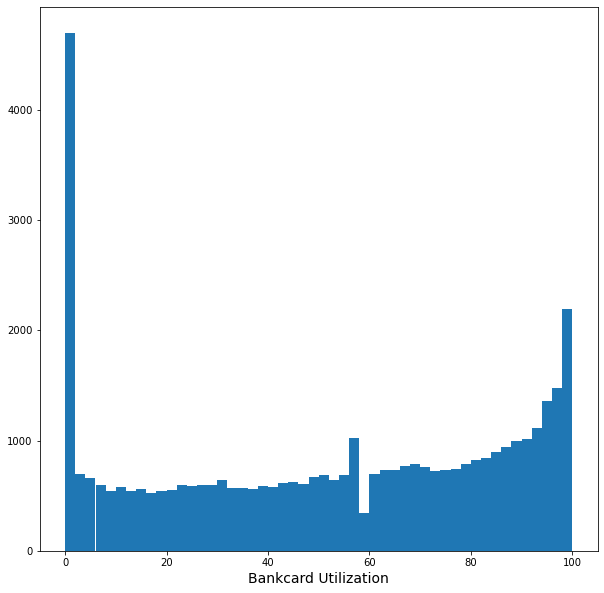

In [22]:
binsize = 2
bins = np.arange(0, loans['BankcardUtilization'].quantile(0.95)+binsize, binsize)
plt.figure(figsize=[10, 10])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlabel('Bankcard Utilization', size =14)
plt.show()

The distribution of BankcardUtilization also has long tail so I remove the outliers - top 5%. After removing the outliers, it shows that the Bankcard Utilization percentage peaks at 2 points: 0% and 100%. In addition, the number of loans increases gradually when the percentage increase.There is an interesting detail that the number of loans suddenly jumps high from 46% to 48%, then drop to by half at 58% and come back to the gradul increase trend at 60%.

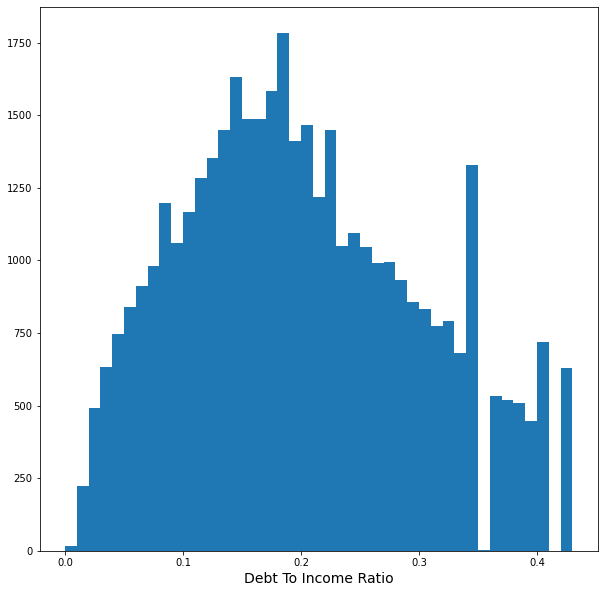

In [23]:
#DebtToIncomeRatio
binsize = 0.01
bins = np.arange(0, loans['DebtToIncomeRatio'].quantile(0.9)+binsize, binsize)
plt.figure(figsize=[10, 10])
plt.hist(data = loans, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio', size =14)
plt.show()

The distribution of Debt To Income Ratio is normal distribution with the peak at 0.18. However, there is a sudden drop and spike throughout the chart, for example the drop next to the peak, the spike at 0.34 and then drop to zero. 

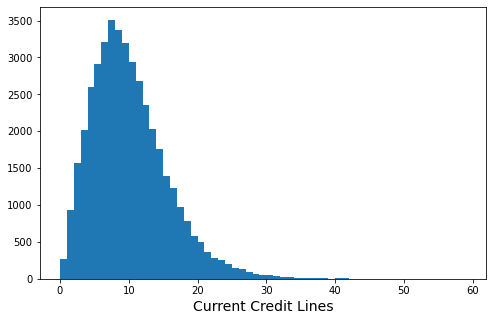

In [24]:
#Distribution of Current Credit Lines
binsize = 1
bins = np.arange(0, loans['CurrentCreditLines'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'CurrentCreditLines', bins = bins)
plt.xlabel('Current Credit Lines', size =14)
plt.show()

Distribution of Current credit lines is right-skewd and almost bell-shaped. The peak is 9 with nearly 3500 borrowers, but there are also borrowers with much more current credit lines, such as 40.

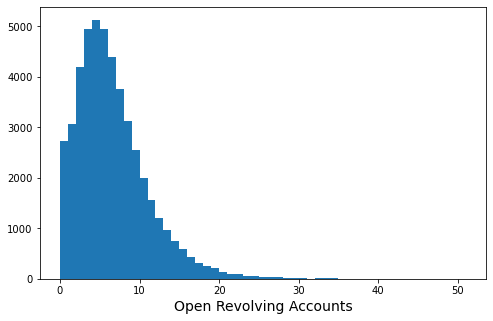

In [25]:
#Distribution of Open Revolving Accounts
binsize = 1
bins = np.arange(0, loans['OpenRevolvingAccounts'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'OpenRevolvingAccounts', bins = bins)
plt.xlabel('Open Revolving Accounts', size =14)
plt.show()

Open Revolving Accounts has similar distribution of other variables like Current Credit Lines and Stated Monthly Income. It is skewed right with the peak at 6 then gradually decrease as the number of open revolving accounts increases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Among status-defined loand, although most of the loans is complete, there is a significant amount of Defaulted and Chargeoff loans. The amount of past due and cancelled loans is very small, so is the loans in final payment progress.
- Among listing categories, debt consolidation is the most common reason for a loan. Other reasons have much less frequency. There is also a large amount of loans with no specific reason.
- The distribution of Debt To Income Ratio is normal distribution but there is a sudden drop and spike throughout the chart, for example the drop next to the peak, the spike at 0.34 and then drop to zero. 
- The distribution of BankcardUtilization, Stated monthly income, Loan original amount, Current Credit Lines and Open Revolving Accounts follow the same pattern that is skewed far to the right and drops gradually after the peak as the value increases. To see the distribution more clearly, I had to drop the outliers in the data (log transformation is not applicable because there are 0 values).  
- The most common Prosper score given is 8.0, which is relatively high for a 11 scale rating.The more extreme ratings such as 1.0, 2.0, 3.0 and 11.0 are much more uncommon. 
- Among 3 kinds of terms, 36-month term makes up the most loans, with approximately 45000 loans having this term. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- When investigating the loan status, the loans having status 'Current' is dropped as their final status is not defined yet. Also, the listing category is expressed as number, so I mapped the numbers with corresponding values of Listing category.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [26]:
numeric_attr = ['DebtToIncomeRatio','OpenRevolvingAccounts',
                'CurrentCreditLines','StatedMonthlyIncome','LoanOriginalAmount', 'BankcardUtilization']
categoric_attr = [ 'LoanStatus', 'ListingCategory', 'ProsperScore', 'Term' ]

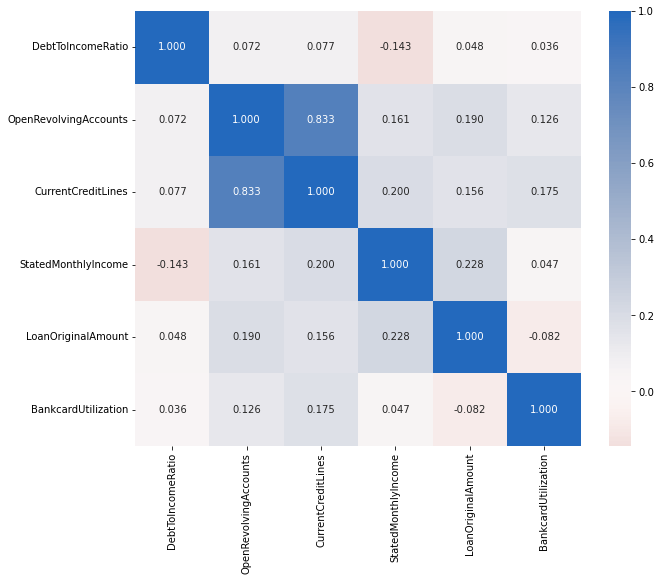

In [27]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(loans[numeric_attr].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

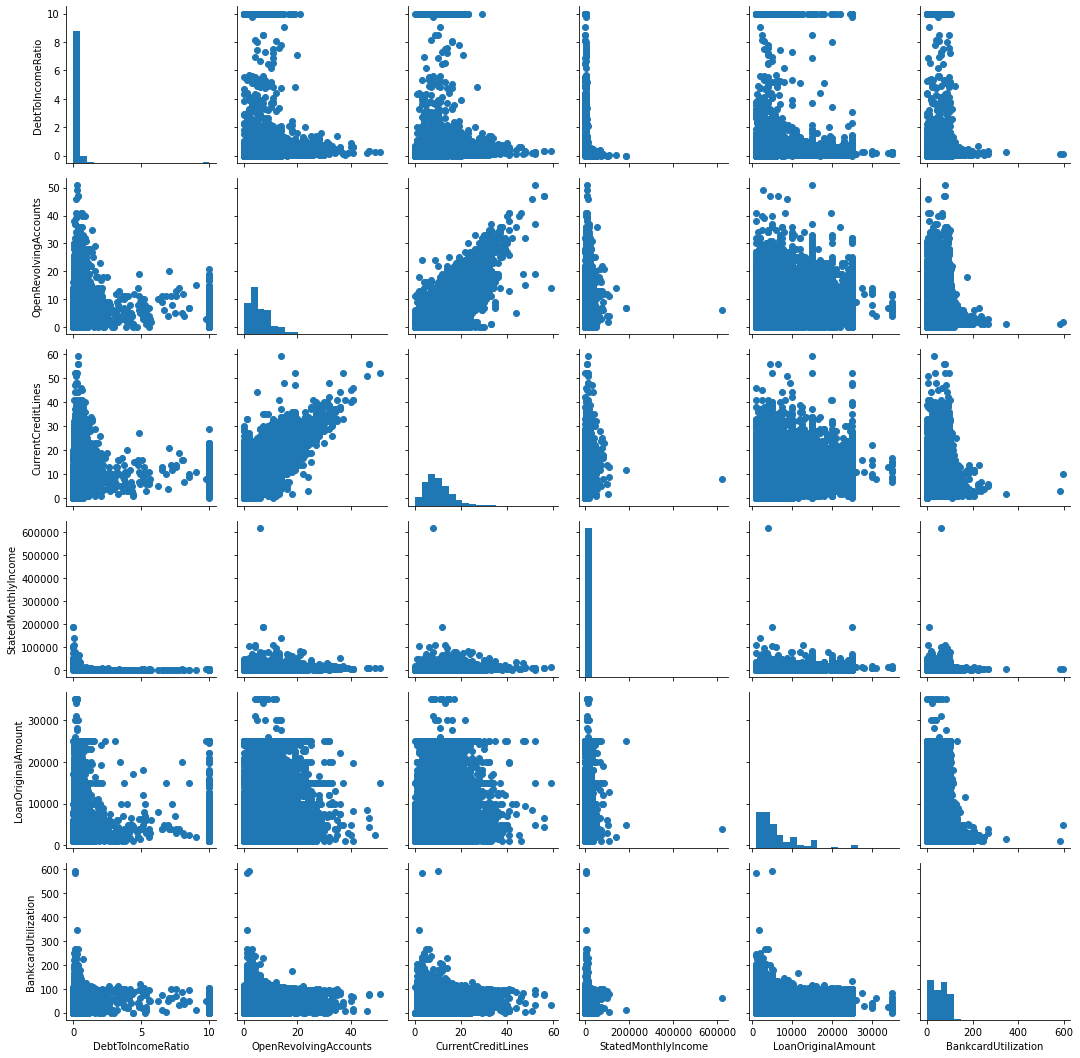

In [28]:
# plot matrix: sample 500 loans 
g = sb.PairGrid(data = loans, vars = numeric_attr)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Susprisingly, there is no clear relationship among numeric variables, except a positive correlation between Current Credit Lines and Open Revolving Accounts. Let's take a look at the relationship between numeric attributes and categorical attributes

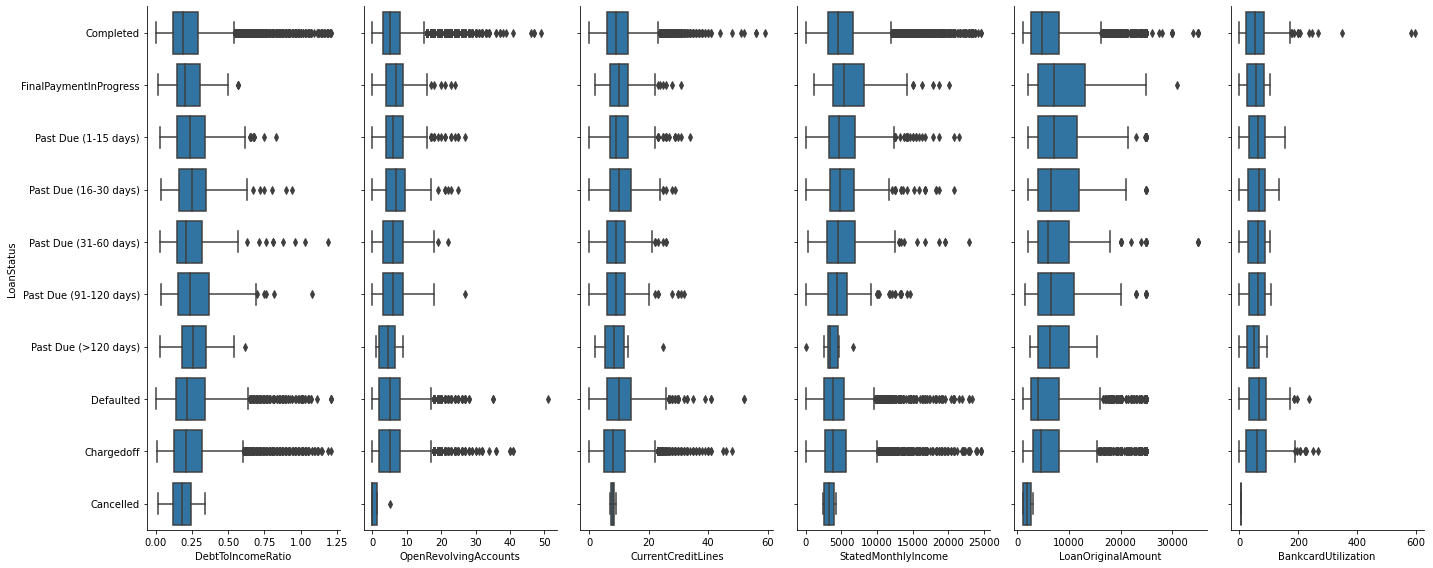

In [29]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
data = loans.query('DebtToIncomeRatio<DebtToIncomeRatio.quantile(0.99) and StatedMonthlyIncome<StatedMonthlyIncome.quantile(0.995)')
g = sb.PairGrid(data = data, x_vars = numeric_attr, y_vars = 'LoanStatus')
g.map(boxgrid);
g.fig.set_size_inches(20, 8);
plt.tight_layout()
plt.show();

Among different loan status, the loans that past due (31-60 days) belong to borrowers having the highest Bankcard utilization. While the loans that past due (91-120 days) have highest average loan original amount. This kind of loan also belong to borrowers who have the most open credit lines and open revolving accounts. 

<Figure size 1800x720 with 0 Axes>

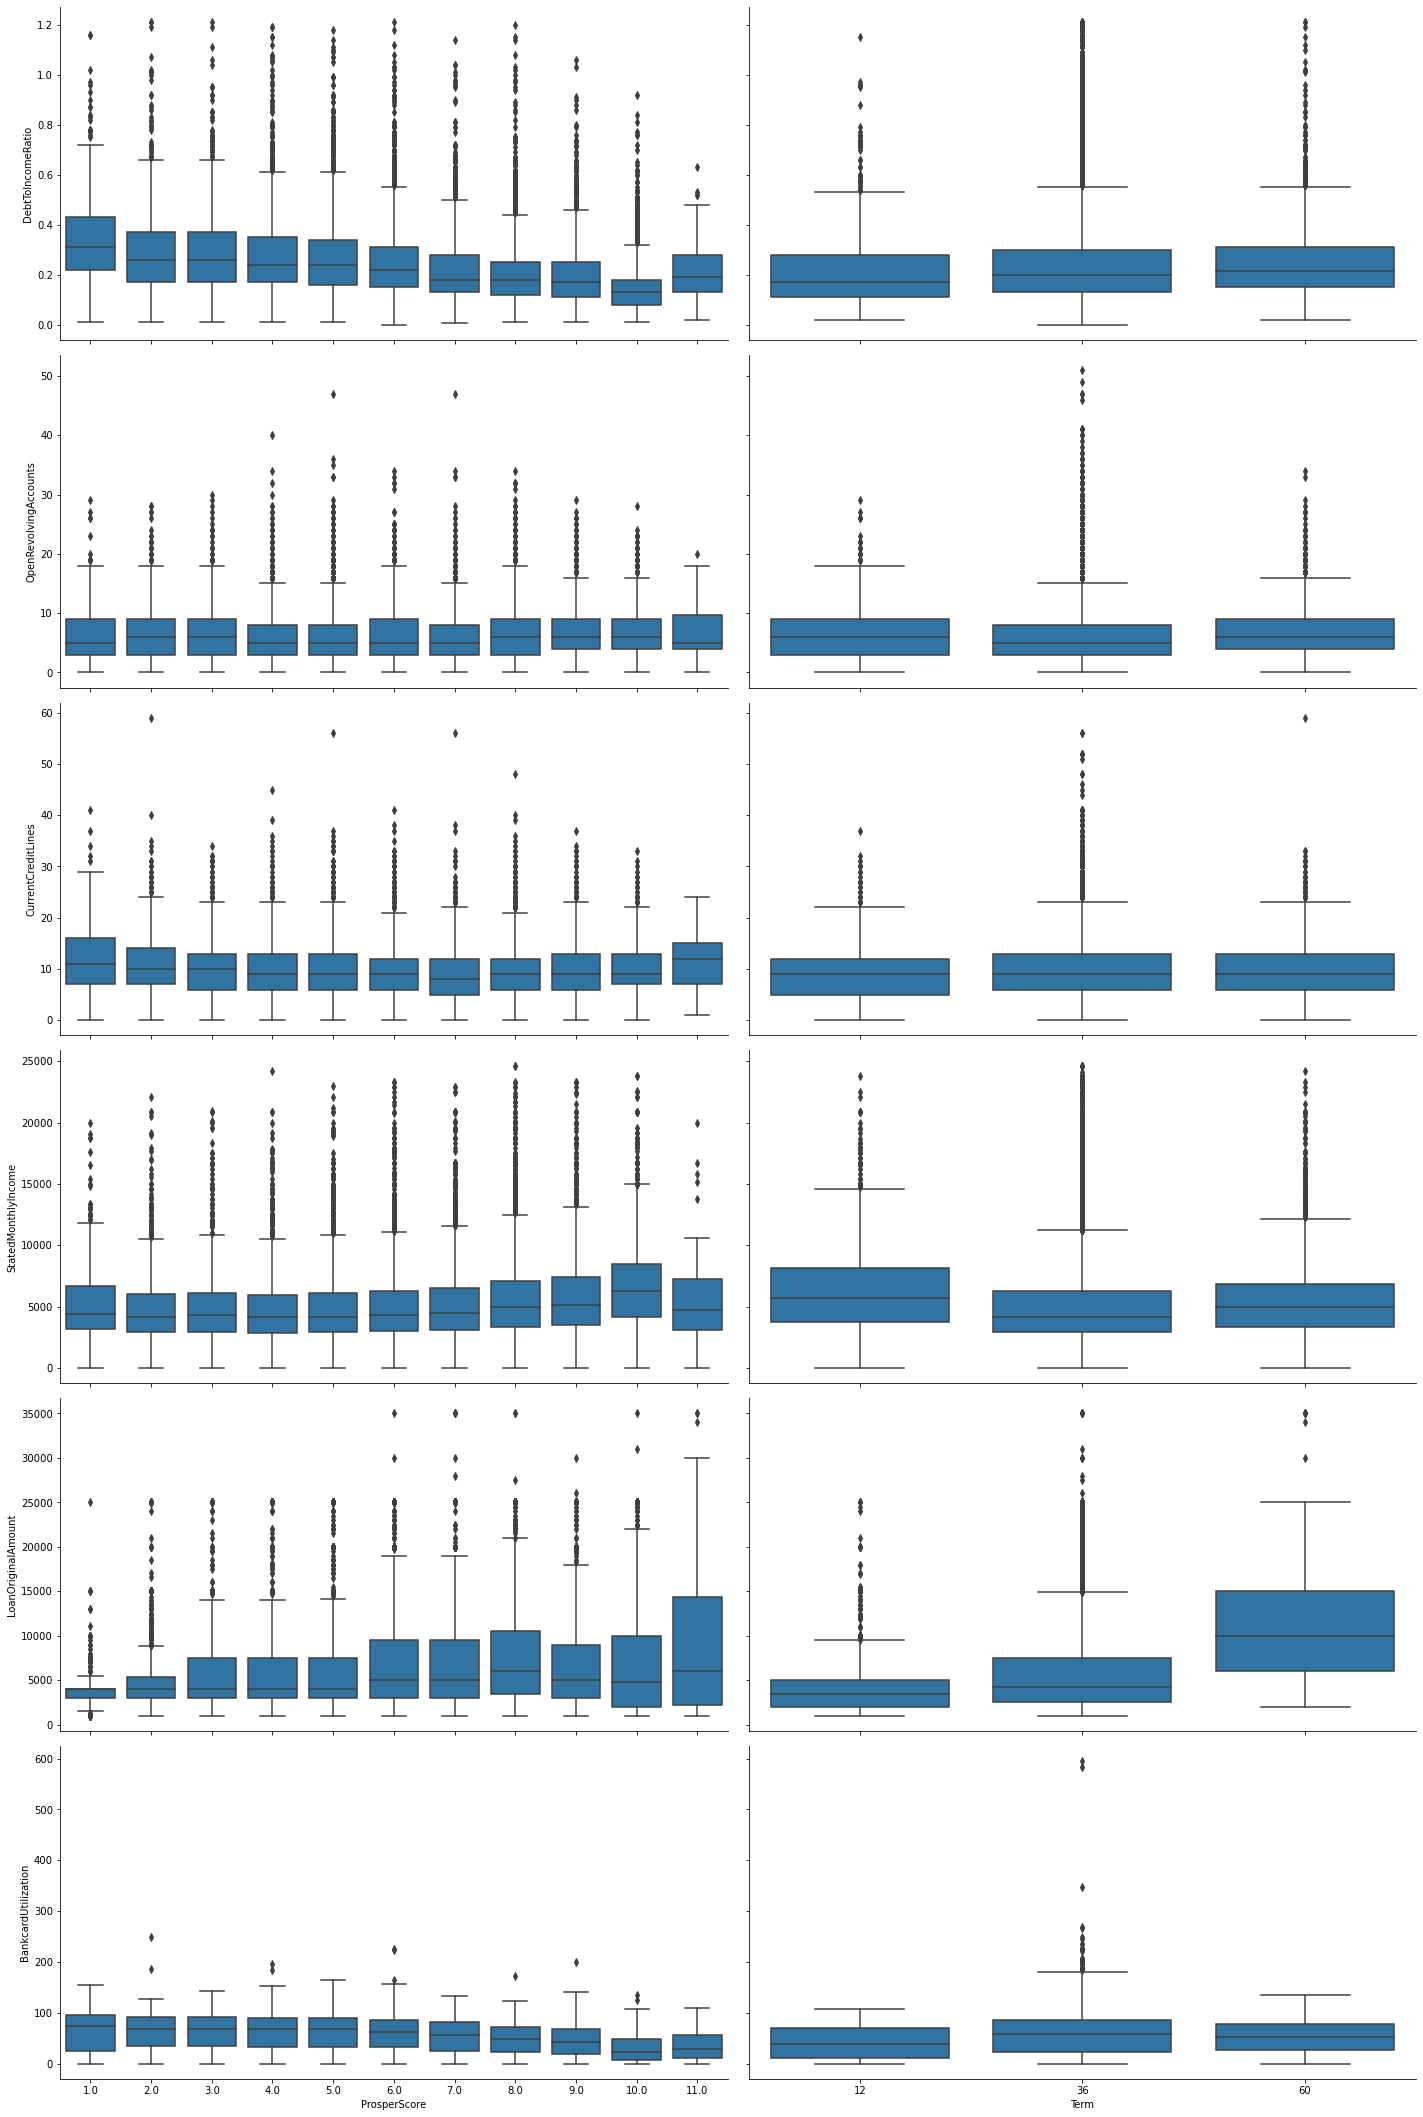

In [30]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [25, 10])
g = sb.PairGrid(data = data, y_vars = numeric_attr, x_vars = ['ProsperScore','Term'],
                height = 5, aspect = 2)
g.map(boxgrid)
plt.show();

- In general, the higher prosper score, the lower bankcard utilization, except prosper score 11 which has higher bankcard utilization percentage than that of prosper score 10. This makes sense because when borrower has used more revolving credit, the risk of loan not being paid is higher.
- The longer loan term, the higher average loan original amount. In particular, the mean loan original amount of 60-month loan term is doulbe that of 36-month loan term. This also makes sense as bigger loans require longer time to pay off. 

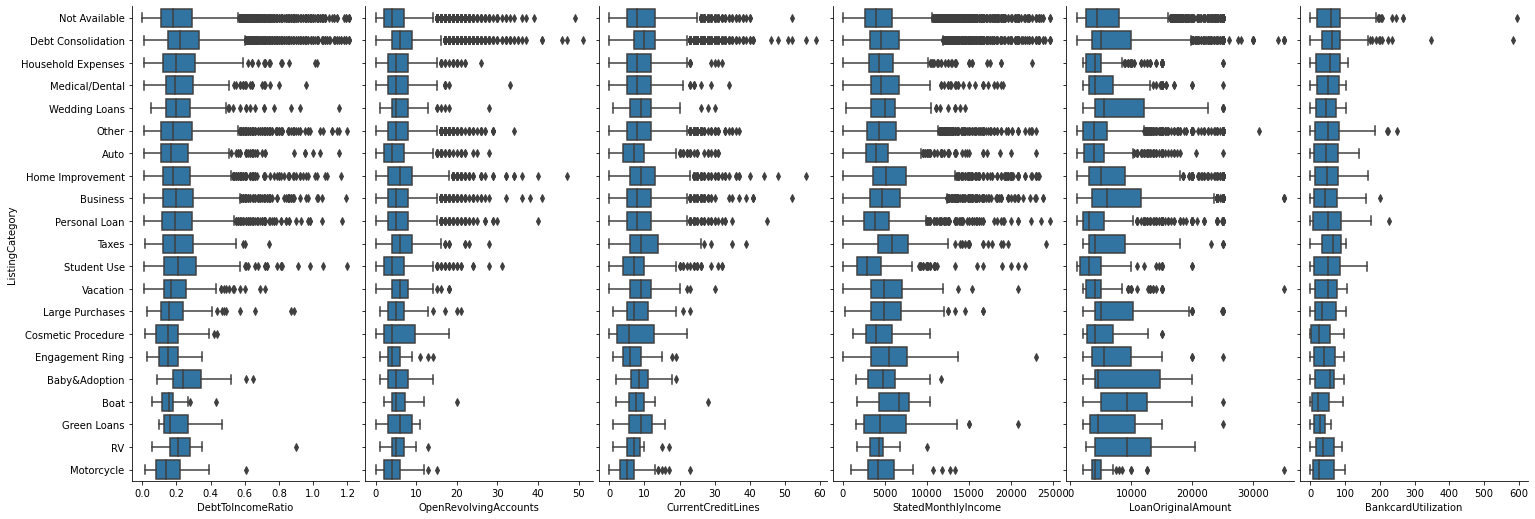

In [31]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
g = sb.PairGrid(data = data, x_vars = numeric_attr, y_vars = 'ListingCategory',
                height = 4, aspect = 3)
g.map(boxgrid);
g.fig.set_size_inches(20, 8);
plt.show();

Among Listing categories, borrowers of Medical/Dental loans have the highest Bankcard utilization while borrowers of Boat loans have the lowest Bankcard utilization. Interestingly, the highest average amount of Loan original amount belongs to Engagement ring loans. The borrowers of Engagement ring loans also have the highest stated monthly income.  The borrowers of Vacation loans have the most current credit lines while borrowers of Green loans have the most open revolving accounts and the borrowers of RV loans have the most total inquiries.

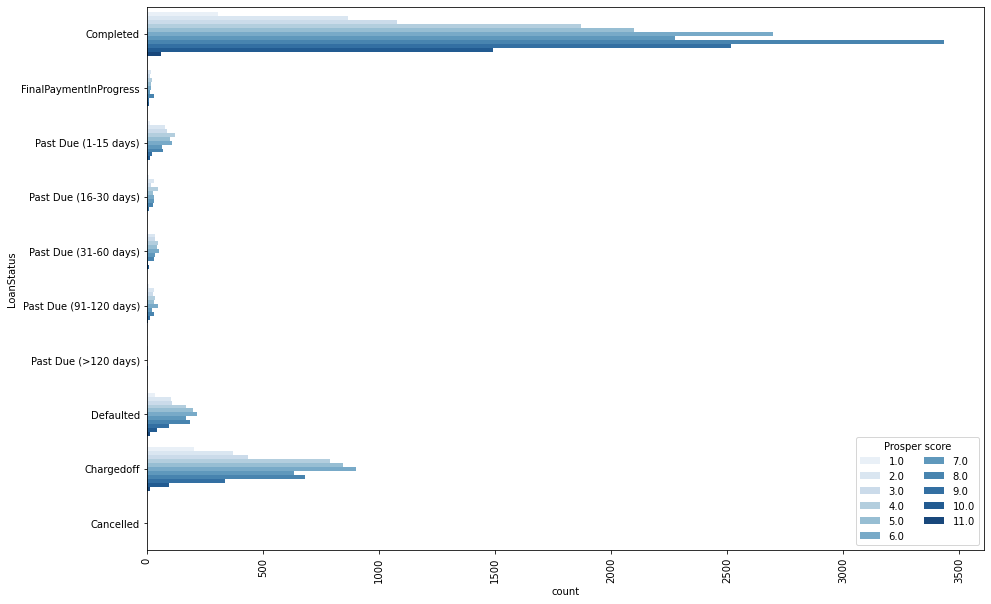

In [32]:
plt.figure(figsize = [15, 10])
ax = sb.countplot(data = loans, y = 'LoanStatus', hue = 'ProsperScore', orient="h", palette = 'Blues')
plt.xticks(rotation = 90)
ax.legend(title = 'Prosper score', loc = 4, ncol = 2)
plt.show();

As expected, the completed loans and loans in final payment progress have higher amount of high prosper score than past due, defaulted and chargedoff loans. In particular, the most common prosper score of completed loans and loans in final payment progress is 8 while other loans have the most common prosper score as 6 or lower.

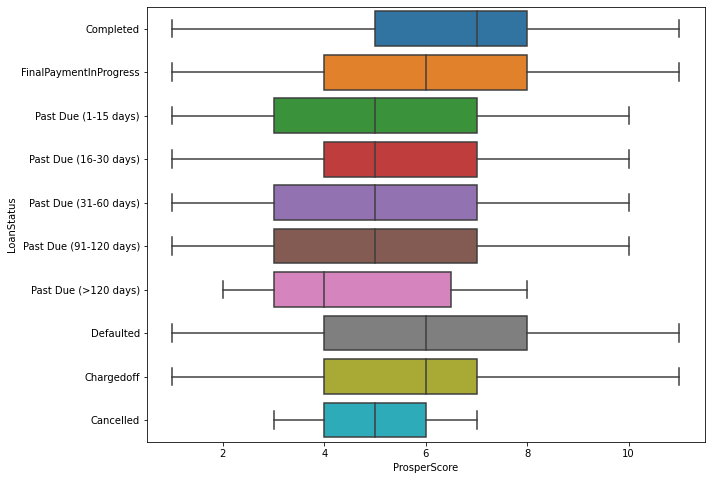

In [33]:
plt.figure(figsize = [10, 8])
sb.boxplot(data=loans, y='LoanStatus', x='ProsperScore', orient='h')
plt.show();

As expected, completed loans have the highest prosper score and the average score decreases when the loans past due. Surprisingly, defaulted and chargedoff loans have the same prosper score as loans in final payment progress, meaning they have higher prosper score than past due loans, even though their prosper score is still less than completed loans.

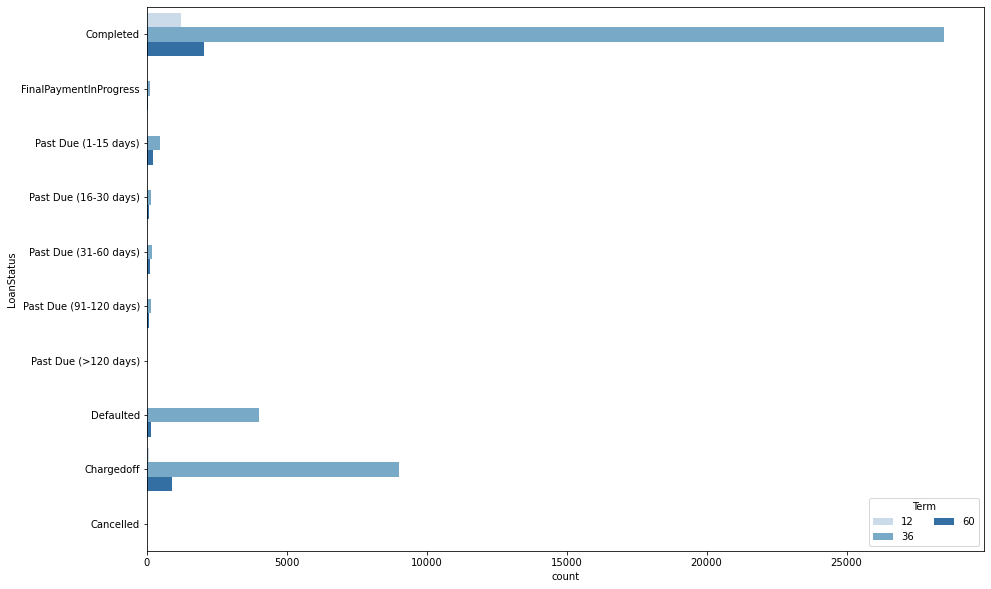

In [34]:
plt.figure(figsize = [15, 10])
ax = sb.countplot(data = loans, y = 'LoanStatus', hue = 'Term', palette = 'Blues', orient='h')
ax.legend(title = 'Term', loc = 4, ncol = 2)
plt.show();

Interestingly, 12-month term loans is very rare/almost none for past due, defaulted and chargedoff loans. The proportion of 60-month term loans is much smaller for these loans compared to completed loans.

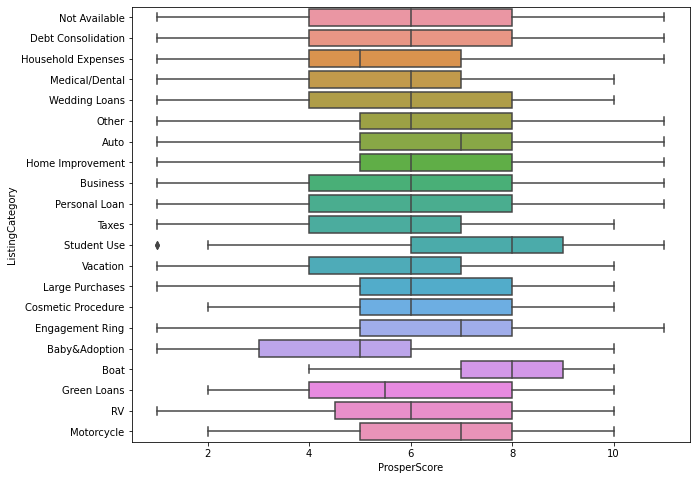

In [35]:
plt.figure(figsize = [10, 8])
sb.boxplot(data=loans, y='ListingCategory', x='ProsperScore', orient='h')
plt.show();

Among Listing categories, most of listing have the average prosper score of 6. Student use loan and Boat loan have highest average prosper score, which is 8. Household expense and Baby&Adoption listings have the lowest prosper score.

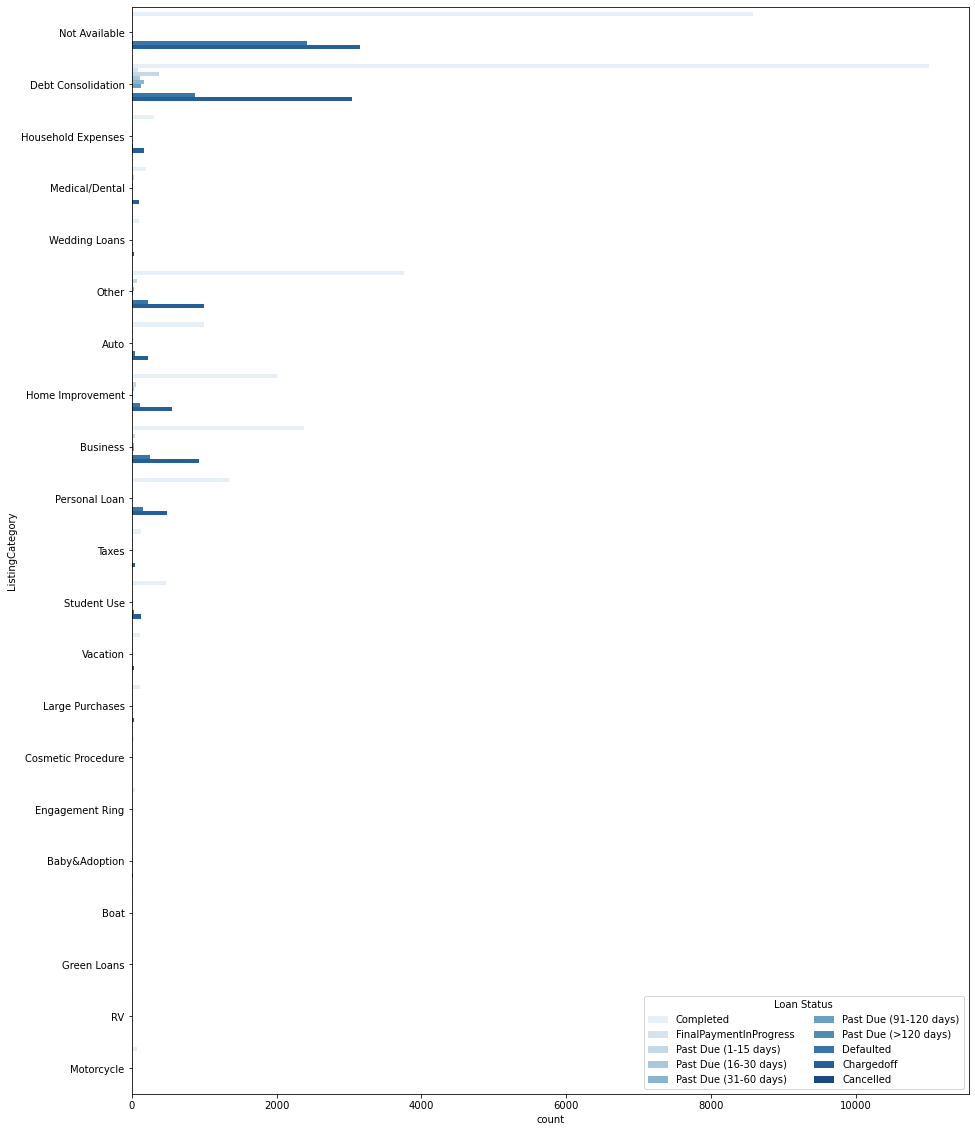

In [36]:
plt.figure(figsize = [15, 20])
ax = sb.countplot(data = loans, y = 'ListingCategory', hue = 'LoanStatus', palette = 'Blues', orient='h')
ax.legend( title = 'Loan Status', loc = 4, ncol = 2)
plt.show();

Interestingly, when compared to overall loan status, the proportion of cancelled and chargedoff loans is much higher in Househols Expenses loans, Home Improvement loans, Business loan and Personal loan.

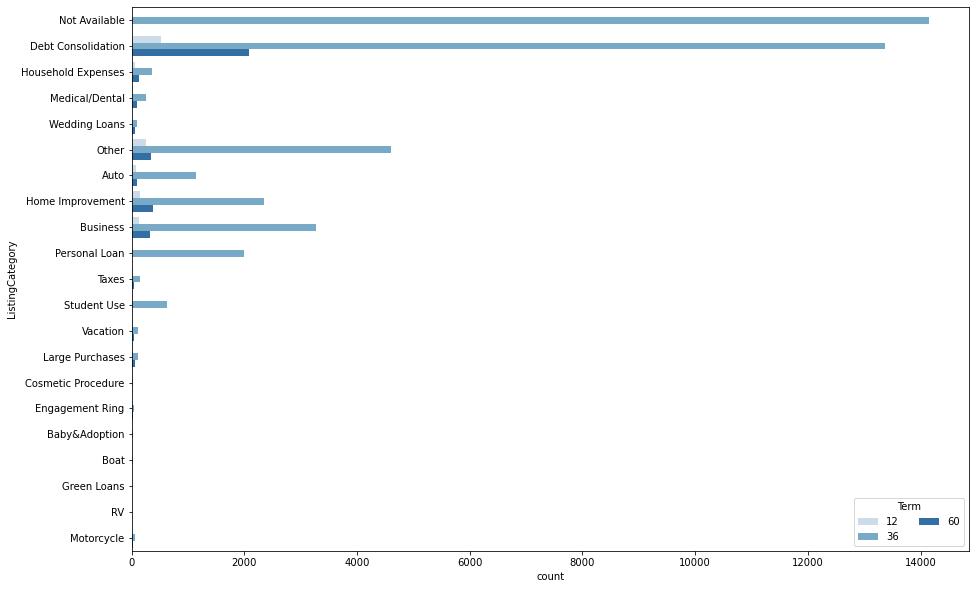

In [37]:
plt.figure(figsize = [15, 10])
ax = sb.countplot(data = loans, y = 'ListingCategory', hue = 'Term', palette = 'Blues', orient = 'h')
ax.legend( title = 'Term', loc = 4, ncol = 2)
plt.show();

As expected, 36-month term loans account for the most loans in all listing categories.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Among different loan status, the loans that past due (31-60 days) belong to borrowers having the highest Bankcard utilization. While the loans that past due (91-120 days) have highest average loan original amount. This kind of loan also belongs to borrowers who have the most open credit lines and open revolving accounts.
- The completed loans and loans in final payment progress have higher amount of high prosper score than past due, defaulted and chargedoff loans. However, completed loan has the highest average prosper score and defaulted loans, chargedoff loans have the same average prosperscore as loans in final payment progress.  
- 12-month term loans is very rare/almost none for past due, defaulted and chargedoff loans. The proportion of 60-month term loans is much smaller for these loans compared to completed loans.
- When compared to overall loan status, the proportion of cancelled and chargedoff loans is much higher in Househols Expenses loans, Home Improvement loans, Business loan and Personal loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The 36-month term loans account for the most loans in all listing categories.
- In general, the higher prosper score, the lower bankcard utilization, except prosper score 11 which has higher bankcard utilization percentage than that of prosper score 10. This makes sense because when borrower has used more revolving credit, the risk of loan not being paid is higher.
- The longer loan term, the higher average loan original amount. In particular, the mean loan original amount of 60-month loan term is doulbe that of 36-month loan term. This also makes sense as bigger loans require longer time to pay off.
- Among Listing categories, borrowers of Medical/Dental loans have the highest Bankcard utilization while borrowers of Boat loans have the lowest Bankcard utilization. Interestingly, the highest average amount of Loan original amount belongs to Engagement ring loans. The borrowers of Engagement ring loans also have the highest stated monthly income. The borrowers of Vacation loans have the most current credit lines while borrowers of Green loans have the most open revolving accounts and the borrowers of RV loans have the most total inquiries. 

## Multivariate Exploration

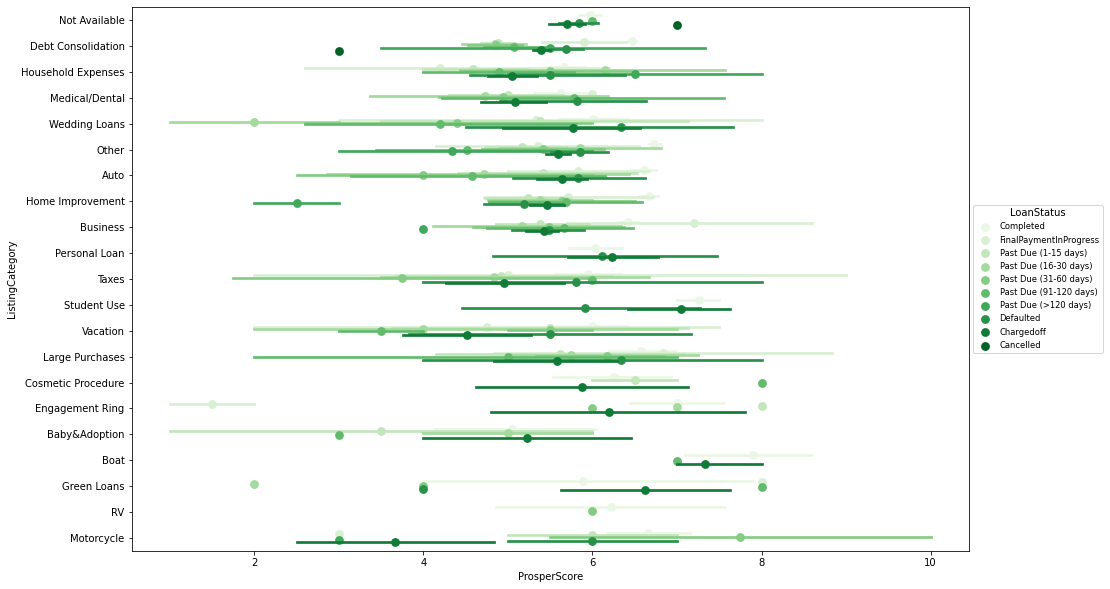

In [38]:
plt.figure(figsize = [15,10])
sb.pointplot(data = loans, y = 'ListingCategory', x = 'ProsperScore', hue = 'LoanStatus', orient = 'h',
             palette = 'Greens', linestyles = '', dodge = 0.4)
plt.legend(title="LoanStatus", loc = 6, fontsize='small', bbox_to_anchor = (1.0, 0.5))
plt.show();

Overall, completed loans have highest prosper score for most of listing categories, even though listing categories has different prosper score ranges. There are stil exceptions for Engagement ring loans, Household expenses, Cosmestic procedure, green loan and motorcycle. 

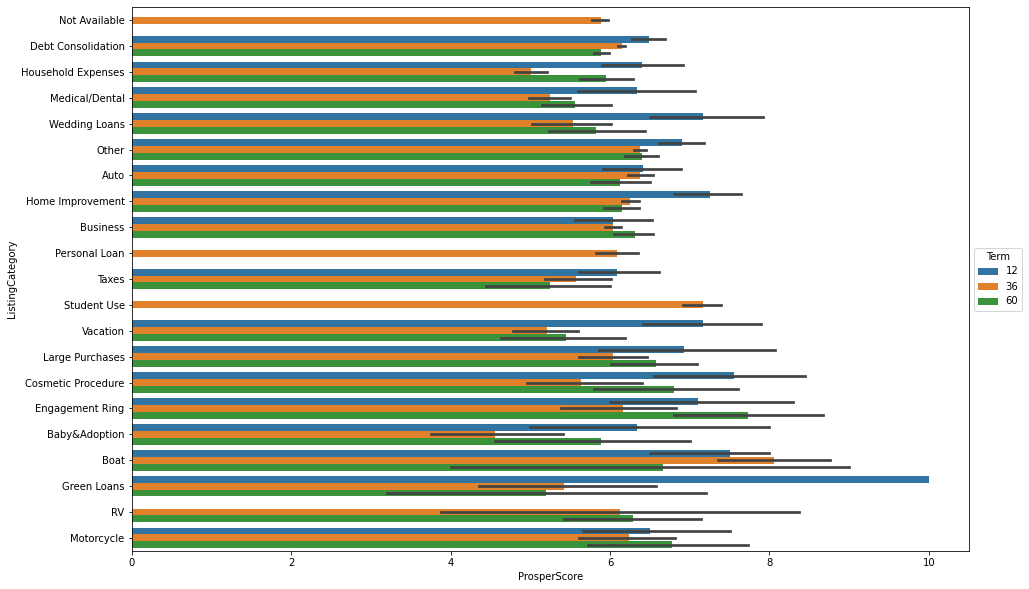

In [39]:
plt.figure(figsize = [15,10])
sb.barplot(data = loans, y = 'ListingCategory', x = 'ProsperScore', hue = 'Term', orient = 'h')
plt.legend(title = 'Term', loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.show();

12-month term loans have the highest average prosper score in all listing categories (except ones that doesn't have this kind of loan term). Interestingly, the other loan terms (36 moth and 60 month) have different average prosper score comparision depending on listing category. 12/19 categories have higher prosper score for 60-month term and the remaining 7 categories are opposite.

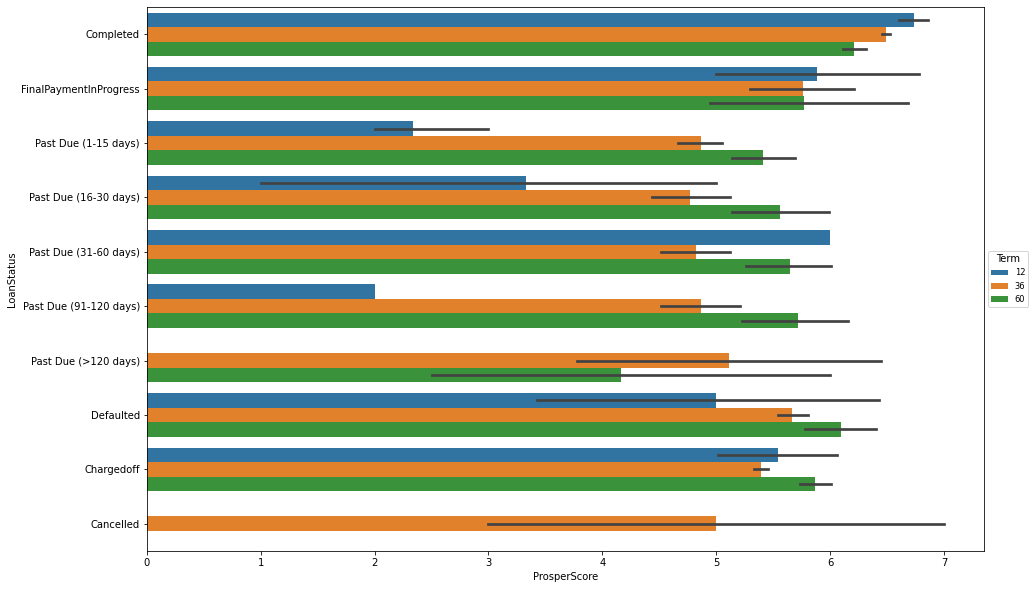

In [40]:
plt.figure(figsize = [15,10])
sb.barplot(data = loans, y = 'LoanStatus', x = 'ProsperScore', hue = 'Term',  orient = 'h' )
plt.legend( title = 'Term', loc = 6, fontsize='small', bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.show();

As expected, completed loans have highest average score for all loan terms compared to other loan status. However, for this loan status, 12-month term has the highest average prosper score and 60-month term has the lowest prosper score. This is contrast with most of other loans where 12-month term is the lowest and 60-month term is the highest.

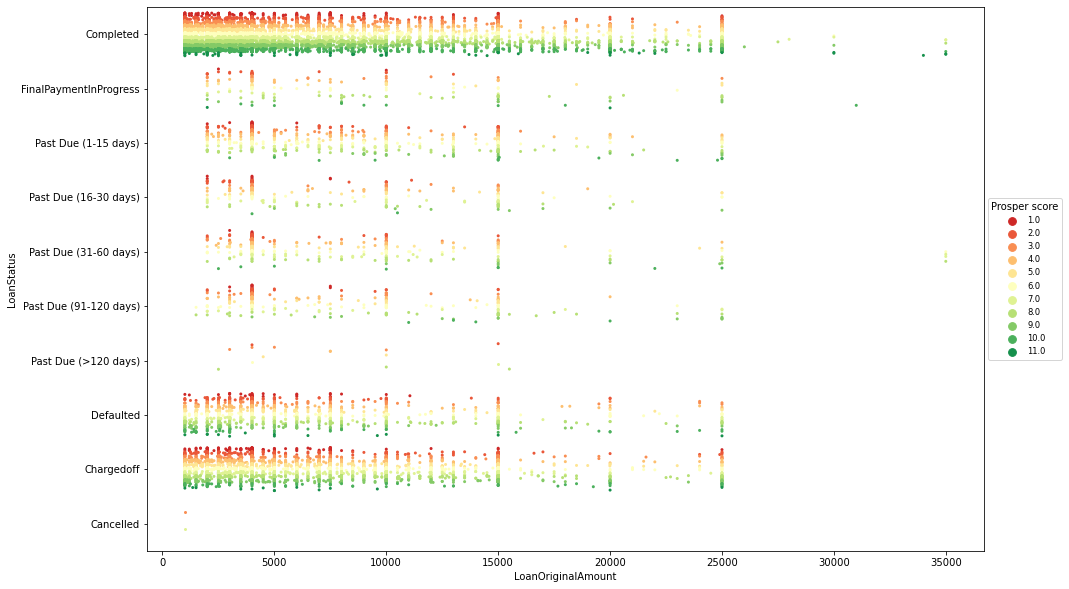

In [41]:
plt.figure(figsize = [15,10])
sb.stripplot(data = loans, y = 'LoanStatus', x = 'LoanOriginalAmount', hue = 'ProsperScore', orient = 'h',
             jitter = 0.35, dodge = True, palette = 'RdYlGn', size = 3)
plt.legend(title="Prosper score", loc = 6, fontsize='small', bbox_to_anchor = (1.0, 0.5))
plt.show();

The relationship between Loan original amount and Prosper score is clearer when plotting with Loan statuses. In general, all loan statuses all have increasing prosper score when the original loan amount increases. This pattern is not clear for Cancelled loan maybe due to the lack of data on this kind of loan. 

In [42]:
loans['LoanAmountCategory'] = ((loans['LoanOriginalAmount']//5000)*5000).astype(int)
data1 = loans.query('LoanOriginalAmount<LoanOriginalAmount.quantile(0.99) and BankcardUtilization<BankcardUtilization.quantile(0.995)')

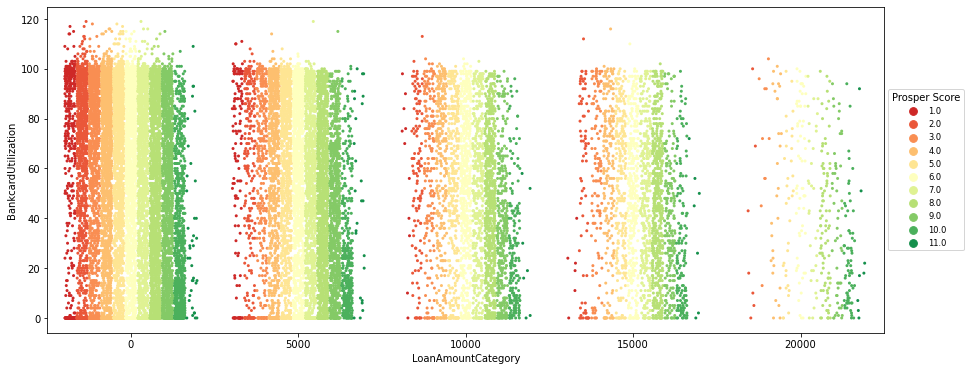

In [43]:
plt.figure(figsize = [15,6])
sb.stripplot(data = data1, x = 'LoanAmountCategory', y = 'BankcardUtilization', hue = 'ProsperScore',
            jitter = 0.35, dodge = True, palette = 'RdYlGn', size = 3)
plt.ylabel('BankcardUtilization')
plt.xlabel('LoanAmountCategory')
plt.legend(loc='center left', title='Prosper Score', fontsize='small', bbox_to_anchor = (1.0, 0.5) )
plt.show();

Interestingly, the distribution of lowest prosper score is densed at the Bankcard utilization of around 100 to 150% and within loans under 5000 dollars.The lower bankcard utilization, the higher prosper score. And loans with large original amount (above 25000$) have much higher prosper score than other loans. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Completed loans have highest prosper score for most of listing categories, even though listing categories has different prosper score ranges. 
- Completed loans have highest average score for all loan terms compared to other loan status. However, for this loan status, 12-month term has the highest average prosper score and 60-month term has the lowest prosper score. This is contrast with most of other loans where 12-month term is the lowest and 60-month term is the highest.
- All loan statuses all have increasing prosper score when the original loan amount increases. This pattern is not clear for Cancelled loan maybe due to the lack of data on this kind of loan. 

### Were there any interesting or surprising interactions between features?

- 12-month term loans have the highest average prosper score in all listing categories. Interestingly, the other loan terms (36 moth and 60 month) have different average prosper score comparision depending on listing category.
- The distribution of lowest prosper score is densed at the Bankcard utilization of around 100 to 150% and within loans under 5000 dollars.The lower bankcard utilization, the higher prosper score. And loans with large original amount (above 25000$) have much higher prosper score than other loans. 

## Conclusions
- Among status-defined loand, although most of the loans is complete, there is a significant amount of Defaulted and Chargeoff loans. The amount of past due and cancelled loans is very small, so is the loans in final payment progress. 
- Among listing categories, debt consolidation is the most common reason for a loan. Other reasons have much less frequency. There is also a large amount of loans with no specific reason.
- Interestingly, the distribution of numeric attributes such as BankcardUtilization, Stated monthly income, Loan original amount, Current Credit Lines and Open Revolving Accounts does not correlate to each other and also doesn't show direct affect on Loan status. They have relationship with Prosper score instead.
- The most common Prosper score given is 8.0, which is relatively high for a 11 scale rating.The more extreme ratings such as 1.0, 2.0, 3.0 and 11.0 are much more uncommon. Completed loans have highest prosper score for most of listing categories, even though listing categories has different prosper score ranges. 
- Among 3 kinds of terms, 36-month term makes up the most loans, with approximately 45000 loans having this term. 
- The completed loans and loans in final payment progress have higher amount of high prosper score than past due, defaulted and chargedoff loans. However, completed loan has the highest average prosper score and defaulted loans, chargedoff loans have the same average prosperscore as loans in final payment progress.  
- 12-month term loans is very rare/almost none for past due, defaulted and chargedoff loans. The proportion of 60-month term loans is much smaller for these loans compared to completed loans.
- When compared to overall loan status, the proportion of cancelled and chargedoff loans is much higher in Househols Expenses loans, Home Improvement loans, Business loan and Personal loan.
- Completed loans have highest average score for all loan terms compared to other loan status. However, for this loan status, 12-month term has the highest average prosper score and 60-month term has the lowest prosper score. This is contrast with most of other loans where 12-month term is the lowest and 60-month term is the highest.
- All loan statuses all have increasing prosper score when the original loan amount increases. This pattern is not clear for Cancelled loan maybe due to the lack of data on this kind of loan. 